# What is cross entropy?

Cross entropy is the measure of the difference between two probability distributions for given a random variable or a set of events.  

**Probability Distributions:**

Probability distrubutions gives the probability of each outcome of a random experiment or event. It provides the probability of different possible outcomes.

**Information** quantifies the number of bits required to encode and transmit an event. Lower probability events has more information, higher probability events has less information.

Information $h(x)$ can be calculated for an event $x$, given the probability $P(x)$ as follows:

$$h(x) = -log(P(x))$$

**Entropy** is the number of bits required to transmit a randomly selected event from a probability distribution. A skewed distribution has low entropy, whereas a distribution where events have a equal probability has a larger entropy.

$$H(X) = - \sum_{i=1}^{n} P(x_i) . log(P(x_i))$$

**Cross-Entropy** builds upon the idea of entropy from infromation theory and calculate the number of bits required to represent or transmit an average event from one distribution compared to another distribution. 

The intution for this defition comes if we consider a target or underlying probability distribuion P and an approximation of the target distribution Q, then cross-entropy of Q from P is the number of additional bits to represent an event Q instead of P.

The cross-entropy between two probability distribution such as Q from P can be stated formally as $H(P,Q)$ where $H()$ is the cross-entropy function, P may be the target distribution and Q is the approximation of target distribution. 

$$H(P,Q) = - \sum_{i=1}^{n} P(x_i) * log_2(Q(x_i))$$

where $P(x)$ is the probability of an event $x$ in $P$, $Q(x)$ is the probability of event $x$ in $Q$  

# Cross-Entropy vs KL Divergence

Cross-entropy is not KL Divergence. 

It is related to divergence measures, such as KL Divergence that quantifies how much one distribution differs from another. 

Specifically, the Kl divergence measures a very similar quantity to cross-entropy. It measures the average number of extra bits required to represent a message with Q instead of P, not the total number of bits. 

In other words, the Kl divergence is the average number of extra bits needed to encode the data, due to the fact that we used distribution $q$ to encode the data instead of the true distribution $p$.

As such, the KL-divergence is often referred to as *relative entropy*

- **Cross-Entropy**: Average number of total bits to represent an event from Q instead of P.
- **KL Divergence** (Relative Entropy) : Average number of extra bits to represent an event from Q instead of P

KL divergence is calculated as:

$$KL(P || Q) = - \sum_{i=1}^{n} P(x_i) * log\frac{Q(x_i)}{P(x_i)}$$

# Calculating Cross Entropy

Consider a random variable with three discrete events as different colors: red, green and blue.

In [3]:
# define distributions

events = ["red", "green", "blue"]
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]

We can plot a barchart of these probabilities to compare them directly as probability histograms.

P=1.000 Q=1.000


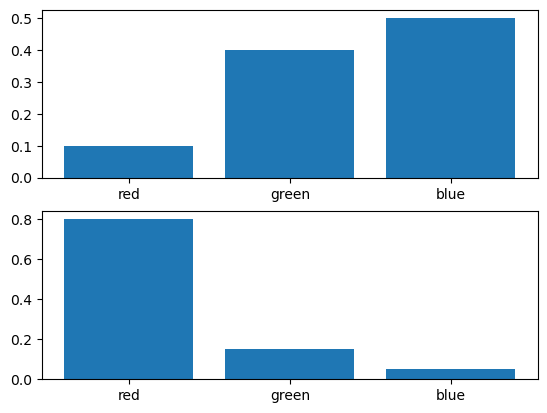

In [4]:
import matplotlib.pyplot as plt

plt.subplot(2,1,1)
plt.bar(events, p)

plt.subplot(2,1,2)
plt.bar(events, q)

plt.show()

# Calculate Cross-Entropy between distributions

We will use log base-2 to ensure that the results are in bits

In [25]:
from math import log2

def cross_entropy(p,q):
    return -sum([p[i]*log2(q[i]) for i in range(len(p))])

In [16]:
ce_pq = cross_entropy(p, q)
print("H(P, Q): %.3f bits" % ce_pq)

ce_qp = cross_entropy(q, p)
print("H(Q, P): %.3f bits" % ce_qp)

H(P, Q): 3.288 bits
H(Q, P): 2.906 bits


# Calculate Cross-Entropy Between a distribution and itself

If two probability distributions are same, then the cross-entropy between them will be the entropy of the distribution. 

In [17]:
ce_pp = cross_entropy(p, p)
print("H(P, P): %.3f bits" % ce_pp)

ce_qq = cross_entropy(q, q)
print("H(Q, Q): %.3f bits" % ce_qq)

H(P, P): 1.361 bits
H(Q, Q): 0.884 bits


# Calculate Cross-Entropy using KL Divergence

In [19]:
def kl_divergence(p, q):
    return sum(p[i] * log2(p[i] / q[i]) for i in range(len(p)))

In [26]:
def entropy(p):
    return -sum([p[i] * log2(p[i]) for i in range(len(p))])

In [21]:
def cross_entropy(p, q):
    return entropy(p) + kl_divergence(p, q)

In [28]:
en_p = entropy(p)
print("H(P): %.3f bits" % en_p)

kl_pq = kl_divergence(p, q)
print("KL(P || Q): %.3f bits" % kl_pq)

ce_pq = cross_entropy(p, q)
print("H(P, Q): %.3f bits" % ce_pq)

H(P): 1.361 bits
KL(P || Q): 1.927 bits
H(P, Q): 3.288 bits


# Cross-Entropy as Loss Functions

It is widely used as loss function when optimizing classification models. 

Idea of cross-entropy may be useful for optimizing a classification model. 

Each example has a known class label probability of 1.0 and probability of 0.0 for all other labels. A model can estimate the probability of an example belonging to each class label. Cross-entropy then can be used to calculate the difference between the two probability distributions. 

We can map the classification of one example onto the idea of a random variable with probability distribution as follows:

- **Random Variable**: The example for which we require predicted class label
- **Events** : Each class label that could be predicted

In classification tasks, we know the target probability distribution P for an input as the class label 0 or 1 interpreted as probabilities as "impossible" or "certain" respectively. These proabilities have no surprise at all, therefore they have no information content or zero entropy.

Our model seeks to approximate the target probability distribution Q.

In the language of classification, these are the actual and the predicted probabilities or $y$ and $\hat{y}$

- **Expected Probability (y)**: The known probability of each class label for an example in the dataset (P).
- **Predicted Probability ($\hat{y}$)**: The probability of each class label an example predicted by the model (Q).

We can therefore estimate the cross-entropy for a single prediction using the cross-entropy calculation; for example:

$$H(P,Q) = -\sum_{i=1}^{n} P(x_i) * log(Q(x_i))$$

where each $x_i$ is a class label that could be assigned to the example, and P(X) will be 1 for the known label and 0 for all other labels.

The cross entropy for single example in binary classification task can be stated by unrolling the sum operation as follows:

$$ H(P, Q) = - (P(class0) * log(Q(class0)) + P(class1) * log(Q(class1))) $$

When calculating cross-entropy for classification tasks, the base-e or natural logrithm is used

# Calculate Cross-Entropy between Class labels and Probabilities

The use of cross-entropy for classification often gives different specific names based on the number of classes, mirroring the name of classification task; for example:

- **Binary cross-entropy**: Cross-entropy as a loss function for binary classification task
- **Categorical cross-entropy**: Cross-entropy as a loss function for multiclass classification task

Consider a two-class classification task with the following 10 actual class labels (P) and predicted class labels (Q)

In [40]:
from math import log

# define classification data
p = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
q = [0.8, 0.9, 0.9, 0.6, 0.8, 0.1, 0.4, 0.2, 0.1, 0.3]

# calculate cross entropy
def cross_entropy(p, q):
    return -sum([p[i]*log(q[i]) for i in range(len(p))])

For each actual and predicted probability, we must convert the prediction into a distribution of probabilities across each event, in this case, the classes {0, 1} as 1 minus the probability for class 0 and probability for class 1.

In [41]:
# calculate cross entropy for each example
results = list()
for i in range(len(p)):
 # create the distribution for each event {0, 1}
 expected = [1.0 - p[i], p[i]]
 predicted = [1.0 - q[i], q[i]]
 # calculate cross entropy for the two events
 ce = cross_entropy(expected, predicted)
 print('>[y=%.1f, yhat=%.1f] ce: %.3f nats' % (p[i], q[i], ce))
 results.append(ce)

>[y=1.0, yhat=0.8] ce: 0.223 nats
>[y=1.0, yhat=0.9] ce: 0.105 nats
>[y=1.0, yhat=0.9] ce: 0.105 nats
>[y=1.0, yhat=0.6] ce: 0.511 nats
>[y=1.0, yhat=0.8] ce: 0.223 nats
>[y=0.0, yhat=0.1] ce: 0.105 nats
>[y=0.0, yhat=0.4] ce: 0.511 nats
>[y=0.0, yhat=0.2] ce: 0.223 nats
>[y=0.0, yhat=0.1] ce: 0.105 nats
>[y=0.0, yhat=0.3] ce: 0.357 nats


In [42]:
from numpy import mean

#calculate the average cross entropy
mean_ce = mean(results)
print('Average Cross Entropy: %.3f nats' % mean_ce)

Average Cross Entropy: 0.247 nats
